In [59]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [60]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [61]:
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label


scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [62]:
BUFFER_SIZE = 1000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

In [63]:
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)
validation_inputs, validation_targets = next(iter(validation_data))
print(validation_inputs.shape, validation_targets.shape)

(6000, 28, 28, 1) (6000,)


In [64]:
input_size = 784
output_size = 10

hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),

    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
NUM_EPOCHS = 30

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_data, epochs=NUM_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=1)

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7885 - loss: 0.7357 - val_accuracy: 0.9337 - val_loss: 0.2288
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9398 - loss: 0.2058 - val_accuracy: 0.9473 - val_loss: 0.1771
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9546 - loss: 0.1520 - val_accuracy: 0.9567 - val_loss: 0.1504
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9649 - loss: 0.1196 - val_accuracy: 0.9625 - val_loss: 0.1323
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9710 - loss: 0.0998 - val_accuracy: 0.9613 - val_loss: 0.1308
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9744 - loss: 0.0856 - val_accuracy: 0.9633 - val_loss: 0.1191
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9778 - loss: 0.0727 - val_accuracy: 0.9655 - val_loss: 0.1140
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9810 - loss: 0.0645 - val_accuracy: 0.

In [66]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step - accuracy: 0.9696 - loss: 0.1018
Test loss: 0.10. Test accuracy: 96.96%


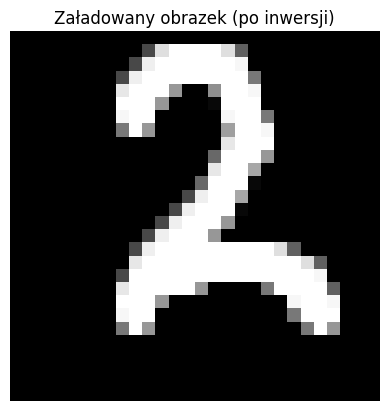

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model przewiduje: 2


In [95]:
img = cv2.imread('/content/sample_data/2.png', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (28, 28))
img_normalized = img_resized / 255.0
img_input = img_normalized.reshape(1, 28, 28, 1)

plt.imshow(img_resized, cmap='gray')
plt.title("Załadowany obrazek (po inwersji)")
plt.axis('off')
plt.show()

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)

print(f"Model przewiduje: {predicted_label}")
